In [348]:
import yfinance as yf

ticker = 'SBIN.NS'
start_date = '2022-01-01'
end_date = '2024-02-21'

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [349]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import os

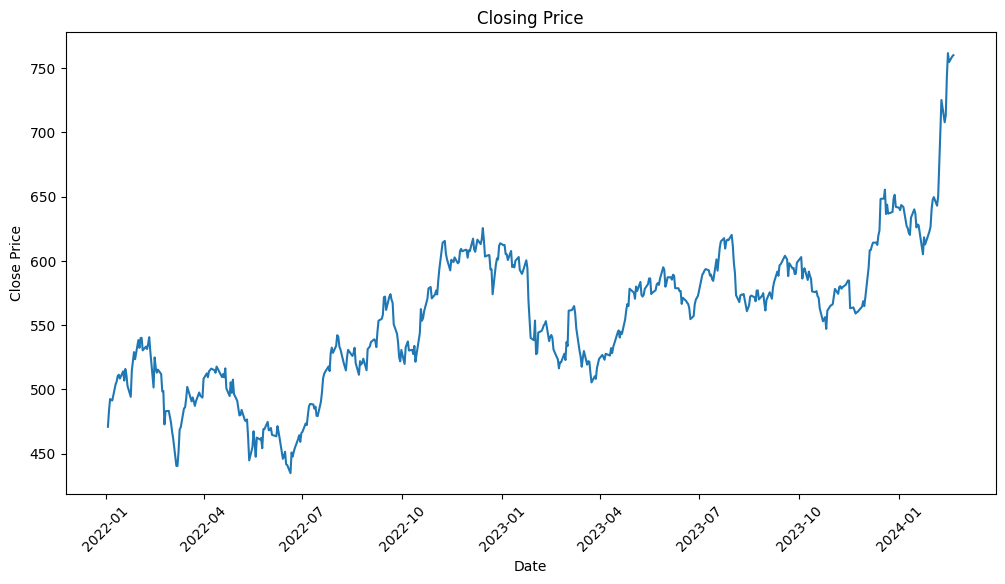

In [350]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')

# Specify the path to the "images" folder
images_folder = 'images\ClosePriceGraph'
os.makedirs(images_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Save the plot with the name of the ticker in the "images" folder
filename = os.path.join(images_folder, f'{ticker}.png')
plt.savefig(filename)

# Show the plot (optional)
plt.show()

In [351]:
import math

data=df.filter(['Close'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

423

In [352]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.11039748],
       [0.14923544],
       [0.17645254],
       [0.17431193],
       [0.17293574],
       [0.21085621],
       [0.21788991],
       [0.23103972],
       [0.23440365],
       [0.22522934],
       [0.24250761],
       [0.22048922],
       [0.24801216],
       [0.23455652],
       [0.20795107],
       [0.18180423],
       [0.24449545],
       [0.2882263 ],
       [0.27140673],
       [0.3168195 ],
       [0.29847087],
       [0.32140665],
       [0.32232405],
       [0.29235467],
       [0.30137611],
       [0.29556564],
       [0.30749232],
       [0.32370023],
       [0.29021396],
       [0.20397548],
       [0.27553509],
       [0.25076453],
       [0.23929664],
       [0.24648311],
       [0.2359327 ],
       [0.19480117],
       [0.19571865],
       [0.11605499],
       [0.14755352],
       [0.14831804],
       [0.12094797],
       [0.09999994],
       [0.08333333],
       [0.01712531],
       [0.01712531],
       [0.05198777],
       [0.10397554],
       [0.109

In [353]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(70, len(train_data)):
    x_train.append(train_data[i-70:i,0])
    y_train.append(train_data[i,0])
    if i<=70:
        print(x_train)
        print(y_train)
        print()

[array([0.11039748, 0.14923544, 0.17645254, 0.17431193, 0.17293574,
       0.21085621, 0.21788991, 0.23103972, 0.23440365, 0.22522934,
       0.24250761, 0.22048922, 0.24801216, 0.23455652, 0.20795107,
       0.18180423, 0.24449545, 0.2882263 , 0.27140673, 0.3168195 ,
       0.29847087, 0.32140665, 0.32232405, 0.29235467, 0.30137611,
       0.29556564, 0.30749232, 0.32370023, 0.29021396, 0.20397548,
       0.27553509, 0.25076453, 0.23929664, 0.24648311, 0.2359327 ,
       0.19480117, 0.19571865, 0.11605499, 0.14755352, 0.14831804,
       0.12094797, 0.09999994, 0.08333333, 0.01712531, 0.01712531,
       0.05198777, 0.10397554, 0.10902139, 0.15428129, 0.156422  ,
       0.1775229 , 0.20550453, 0.17094799, 0.18042813, 0.17110086,
       0.16024463, 0.17125382, 0.19204889, 0.18440363, 0.18226292,
       0.17996934, 0.22477064, 0.23761472, 0.22844031, 0.24235474,
       0.24541284, 0.24892955, 0.24525998, 0.23899071, 0.25382263])]
[0.22874614003965976]



In [354]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [355]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(353, 70, 1)

In [356]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1],1,),activation='relu'))
#Add second layer to model
model.add(LSTM(100, return_sequences=False,activation='relu'))
#Add Dense Layer to model with 25 neurons
model.add(Dense(50))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [357]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [358]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=50 )

Epoch 1/50
353/353 [==============================] - 10s 21ms/step - loss: 0.0073
Epoch 2/50
353/353 [==============================] - 8s 22ms/step - loss: 0.0032
Epoch 3/50
353/353 [==============================] - 7s 21ms/step - loss: 0.0021
Epoch 4/50
353/353 [==============================] - 8s 21ms/step - loss: 0.0017
Epoch 5/50
353/353 [==============================] - 8s 21ms/step - loss: 0.0017
Epoch 6/50
353/353 [==============================] - 8s 21ms/step - loss: 0.0012
Epoch 7/50
353/353 [==============================] - 8s 23ms/step - loss: 0.0013
Epoch 8/50
353/353 [==============================] - 9s 25ms/step - loss: 0.0012
Epoch 9/50
353/353 [==============================] - 15s 43ms/step - loss: 9.3563e-04
Epoch 10/50
353/353 [==============================] - 17s 48ms/step - loss: 0.0011
Epoch 11/50
353/353 [==============================] - 8s 22ms/step - loss: 0.0012
Epoch 12/50
353/353 [==============================] - 11s 30ms/step - loss: 0.0010
Epoch

In [359]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-70: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(70, len(test_data)):
    x_test.append(test_data[i-70:i,0])

In [360]:
#Convert the data to a numpy array

x_test=np.array(x_test)

In [361]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [362]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


4/4 [==============================] - 1s 16ms/step


C:\Users\soham\AppData\Local\Temp\ipykernel_16348\1877947555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


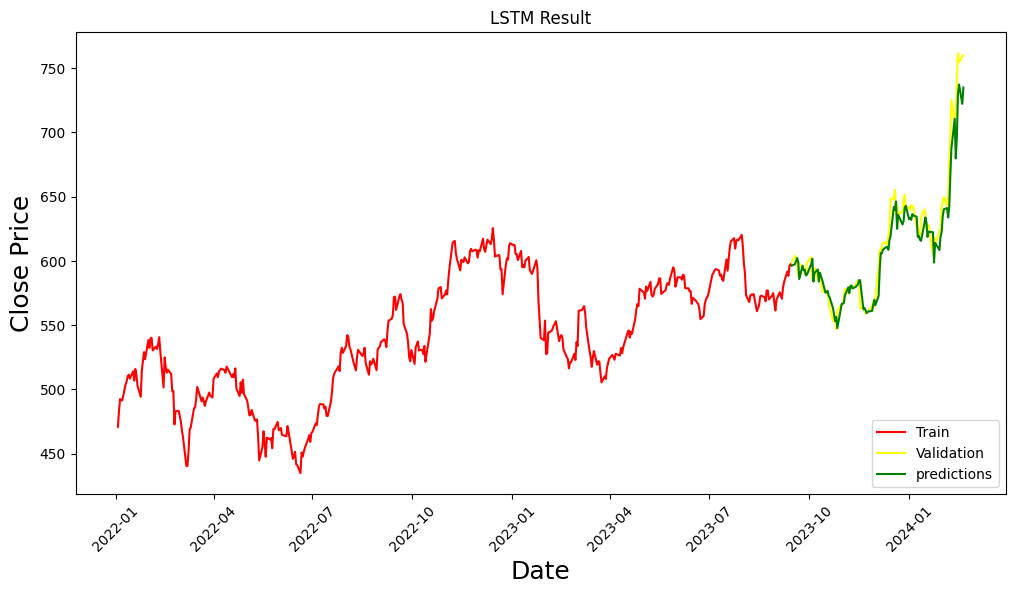

In [363]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title('LSTM Result')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'] , color='red')
plt.plot(valid['Close'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
# Specify the path to the "images" folder
images_folder = 'images\lstmgraph'
os.makedirs(images_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Save the plot with the name of the ticker in the "images" folder
filename = os.path.join(images_folder, f'{ticker}.png')
plt.savefig(filename)

# Show the plot (optional)
plt.show()

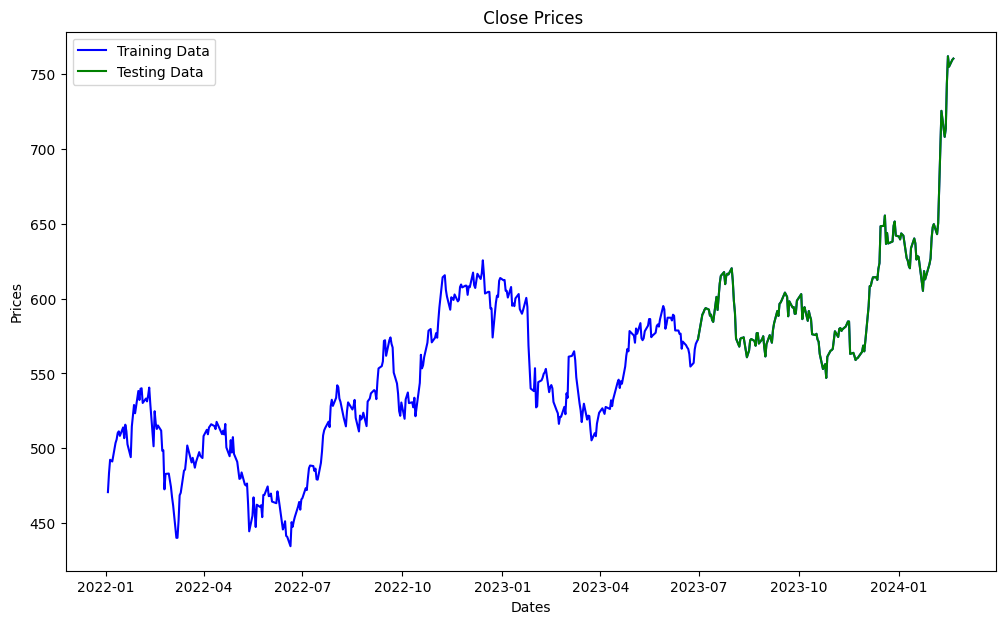

In [364]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
plt.figure(figsize=(12,7))
plt.title(' Close Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

In [365]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = ARIMA(history, order=(5, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)




<class 'list'>


C:\Users\soham\AppData\Local\Temp\ipykernel_16348\3411999980.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Close'],'green', color='blue', label='Training Data')


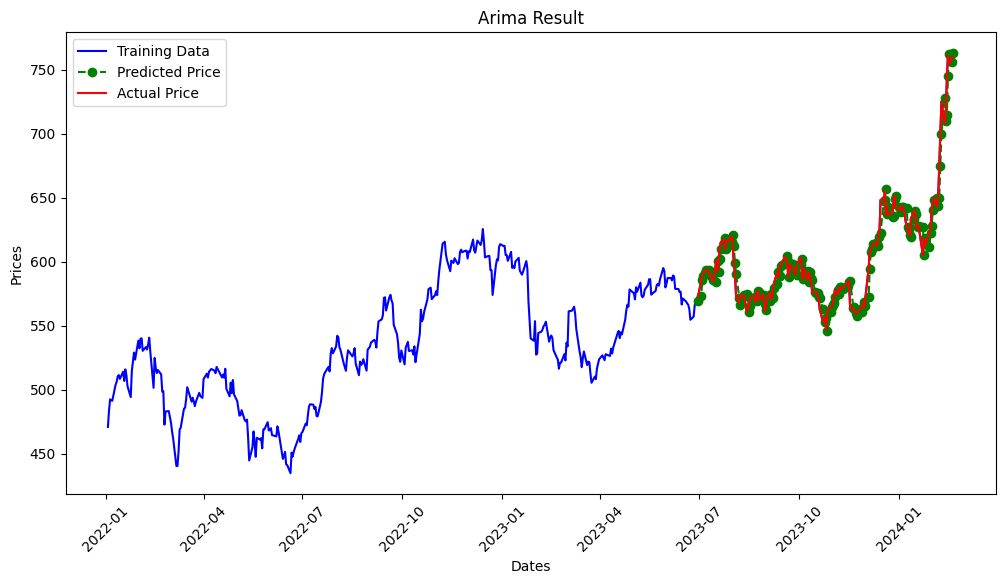

In [366]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.plot(df['Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Arima Result')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
# Specify the path to the "images" folder
images_folder = 'images/arimagraph'
os.makedirs(images_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Save the plot with the name of the ticker in the "images" folder
filename = os.path.join(images_folder, f'{ticker}.png')
plt.savefig(filename)

# Show the plot (optional)
plt.show()

In [367]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
predictions = list()

# SARIMA order
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # SARIMA seasonal order (adjust the seasonal component as needed)

for t in range(len(test_ar)):
    model = SARIMAX(history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False, method='powell', maxiter=1000)
    output = model_fit.get_forecast(steps=1)
    yhat = output.predicted_mean[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)



c:\Users\soham\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\soham\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


C:\Users\soham\AppData\Local\Temp\ipykernel_16348\3501399150.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Close'],'green', color='blue', label='Training Data')


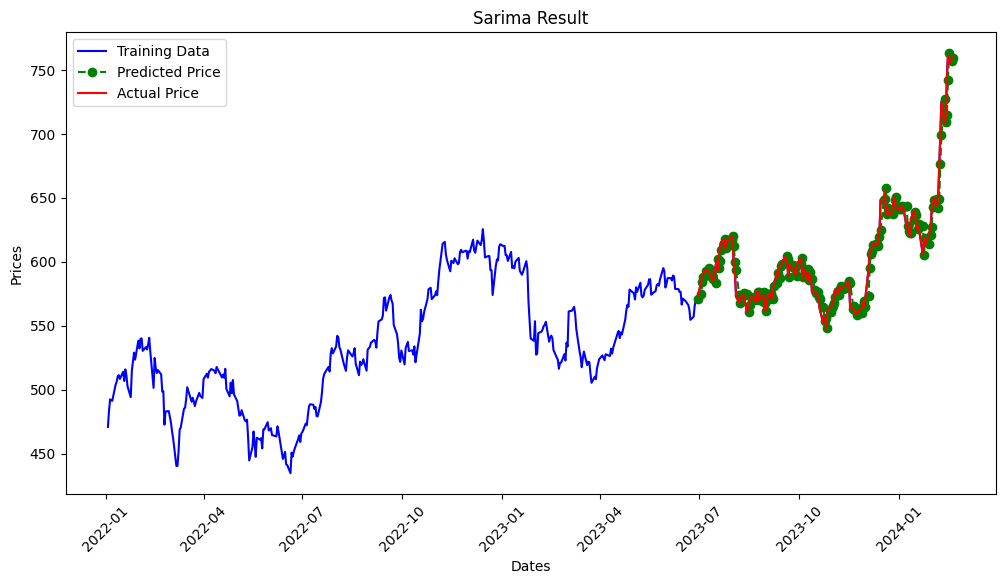

In [368]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.plot(df['Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Sarima Result')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
images_folder = 'images\sarimagraph'
os.makedirs(images_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Save the plot with the name of the ticker in the "images" folder
filename = os.path.join(images_folder, f'{ticker}.png')
plt.savefig(filename)

# Show the plot (optional)
plt.show()
